# ENV

In [9]:
import os

import pandas as pd
import numpy as np
import tensorflow as tf
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import yaml

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

In [2]:
# google drive mount
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data_dir = '/content/drive/MyDrive/Colab Notebooks/TimeSeriese/kma'
os.listdir(data_dir)

['OBS_ASOS_MNH_20201123233109.csv']

# Display

In [ ]:
train_start = pd.to_datetime('1904-04-01')
train_end = pd.to_datetime('2001-12-31 ')
test_start = pd.to_datetime('2010-01-01 ')
test_end = pd.to_datetime('2020-10-31 ')
train_start, test_end

(Timestamp('1904-04-01 00:00:00'), Timestamp('2020-10-31 00:00:00'))

In [ ]:
df = pd.read_csv(os.path.join(data_dir, 'OBS_ASOS_MNH_20201123233109.csv'), encoding='CP949')
df

,지점,지점명,일시,평균기온(°C),평균최고기온(°C),평균최저기온(°C),최고기온(°C),최저기온(°C),최고기온 나타난날(yyyymmdd),최저기온 나타난날(yyyymmdd),평균현지기압(hPa),평균해면기압(hPa),최고해면기압(hPa),최저해면기압(hPa),최고해면기압 나타난날(yyyymmdd),최저해면기압 나타난날(yyyymmdd),평균수증기압(hPa),최고수증기압(hPa),최저수증기압(hPa),최고수증기압 나타난날(yyyymmdd),최저수증기압 나타난날(yyyymmdd),평균이슬점온도(°C),평균상대습도(%),최소상대습도(%),최소상대습도 나타난날(yyyymmdd),월합강수량(00~24h만)(mm),일최다강수량(mm),1시간최다강수량(mm),10분최다강수량(mm),일최다강수량 나타난날(yyyymmdd),1시간최다강수량 나타난날(yyyymmdd),10분최다강수량 나타난날(yyyymmdd),소형총증발량(mm),소형일최대증발량(mm),대형총증발량(mm),대형일최대증발량(mm),소형일최대증발량 나타난날(yyyymmdd),대형일최대증발량 나타난날(yyyymmdd),평균풍속(m/s),최대풍속(m/s),최대순간풍속(m/s),최대풍속 풍향(16방위),최대순간풍속 풍향(16방위),최대풍속 나타난날(yyyymmdd),최대순간풍속 나타난날(yyyymmdd),최다풍향(16방위),평균운량(1/10),평균중하층운량(1/10),합계 일조시간(hr),일조율(%),합계 일사량(MJ/m2),최심적설(cm),최심신적설(cm),3시간신적설합(cm),최심적설 나타난날(yyyymmdd),최심신적설 나타난날(yyyymmdd),평균 최저초상온도(°C),최저초상온도(°C),최저초상온도 나타난날(yyyymmdd),평균지면온도(°C),0.05m평균지중온도(°C),0.1m평균지중온도(°C),0.2m평균지중온도(°C),0.3m평균지중온도(°C),0.5m평균지중온도(°C),1.0m평균지중온도(°C),1.5m평균지중온도(°C),3.0m평균지중온도(°C),5.0m평균지중온도(°C)
0,90,속초,1968-01,-0.7,3.2,-4.4,11.4,-11.4,19680105.0,19680115.0,1018.2,1018.2,1028.8,1000.4,19680127.0,19680113.0,2.9,7.9,1.0,19680106.0,19680131.0,-11.3,47.0,18.0,19680118.0,0.0,0.0,0.0,0.0,19680124.0,19680102.0,19680102.0,108.0,5.6,NaN,NaN,19680102.0,NaN,2.1,13.0,NaN,270.0,NaN,19680113.0,NaN,270.0,2.1,NaN,218.6,72.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,90,속초,1968-02,-2.1,1.9,-5.4,9.7,-9.9,19680218.0,19680201.0,1022.8,1022.8,1030.6,1010.1,19680212.0,19680218.0,2.8,6.9,0.9,19680228.0,19680220.0,-11.9,51.0,17.0,19680203.0,3.3,2.0,0.0,0.0,19680229.0,19680210.0,19680210.0,101.1,7.4,NaN,NaN,19680229.0,NaN,2.2,10.0,NaN,250.0,NaN,19680201.0,NaN,270.0,2.7,NaN,236.5,76.05,NaN,1.8,1.8,4.3,19680223.0,19680223.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,90,속초,1968-03,5.9,9.8,2.1,20.5,-3.2,19680331.0,19680303.0,1016.1,1016.1,1027.0,1003.0,19680325.0,19680305.0,5.4,10.0,1.4,19680329.0,19680301.0,-2.6,57.0,20.0,19680315.0,8.8,3.3,NaN,NaN,19680324.0,NaN,NaN,135.1,8.0,NaN,NaN,19680331.0,NaN,2.1,10.3,NaN,320.0,NaN,19680324.0,NaN,270.0,3.7,NaN,223.7,60.69,NaN,0.0,0.0,0.0,19680308.0,19680308.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,90,속초,1968-04,10.5,14.4,6.7,21.4,4.0,19680403.0,19680413.0,1019.4,1019.4,1029.2,1010.3,19680407.0,19680422.0,7.9,11.7,1.7,19680425.0,19680406.0,3.0,63.0,10.0,19680403.0,6.9,3.4,1.4,1.0,19680408.0,19680405.0,19680405.0,155.1,9.0,NaN,NaN,19680403.0,NaN,2.0,15.0,NaN,340.0,NaN,19680405.0,NaN,90.0,5.1,NaN,255.7,64.88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,90,속초,1968-05,14.6,17.7,11.9,24.5,9.3,19680513.0,19680508.0,1011.7,1011.7,1021.2,995.0,19680516.0,19680513.0,12.0,17.6,3.9,19680531.0,19680513.0,9.3,74.0,14.0,19680513.0,49.1,31.8,5.7,1.3,19680518.0,19680518.0,19680518.0,169.5,16.2,NaN,NaN,19680513.0,NaN,2.2,20.0,NaN,250.0,NaN,19680513.0,NaN,90.0,6.7,NaN,187.8,42.70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53319,295,남해,2020-07,22.6,26.1,20.2,31.6,18.0,20200731.0,20200718.0,1001.9,1007.1,1016.1,996.5,20200731.0,20200724.0,24.3,33.2,18.2,20200731.0,20200701.0,20.5,89.0,54.0,20200701.0,687.0,146.4,33.9,12.6,20200713.0,20200710.0,20200722.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,4.7,13.8,200.0,250.0,20200720.0,20200719.0,250.0,8.0,5.5,84.2,19.08,NaN,NaN,NaN,NaN,NaN,NaN,19.6,16.4,20200702.0,25.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53320,295,남해,2020-08,27.2,31.0,24.4,34.6,22.5,20200820.0,20200824.0,1004.5,1009.6,1015.2,999.5,20200821.0,20200827.0,30.1,35.2,22.8,20200812.0,20200820.0,24.1,85.0,42.0,20200820.0,196.0,51.4,22.9,11.2,20200826.0,20200826.0,20200826.0,NaN,NaN,NaN,NaN,NaN,NaN,1.5,8.2,22.4,110.0,160.0,20200826.0,20200826.0,200.0,5.6,3.3,175.8,42.24,

In [ ]:
df['일시'] = pd.to_datetime(df['일시'], format='%Y-%m')
df = df[(train_start <= df['일시']) & (df['일시'] <= test_end)]
df

,지점,지점명,일시,평균기온(°C),평균최고기온(°C),평균최저기온(°C),최고기온(°C),최저기온(°C),최고기온 나타난날(yyyymmdd),최저기온 나타난날(yyyymmdd),평균현지기압(hPa),평균해면기압(hPa),최고해면기압(hPa),최저해면기압(hPa),최고해면기압 나타난날(yyyymmdd),최저해면기압 나타난날(yyyymmdd),평균수증기압(hPa),최고수증기압(hPa),최저수증기압(hPa),최고수증기압 나타난날(yyyymmdd),최저수증기압 나타난날(yyyymmdd),평균이슬점온도(°C),평균상대습도(%),최소상대습도(%),최소상대습도 나타난날(yyyymmdd),월합강수량(00~24h만)(mm),일최다강수량(mm),1시간최다강수량(mm),10분최다강수량(mm),일최다강수량 나타난날(yyyymmdd),1시간최다강수량 나타난날(yyyymmdd),10분최다강수량 나타난날(yyyymmdd),소형총증발량(mm),소형일최대증발량(mm),대형총증발량(mm),대형일최대증발량(mm),소형일최대증발량 나타난날(yyyymmdd),대형일최대증발량 나타난날(yyyymmdd),평균풍속(m/s),최대풍속(m/s),최대순간풍속(m/s),최대풍속 풍향(16방위),최대순간풍속 풍향(16방위),최대풍속 나타난날(yyyymmdd),최대순간풍속 나타난날(yyyymmdd),최다풍향(16방위),평균운량(1/10),평균중하층운량(1/10),합계 일조시간(hr),일조율(%),합계 일사량(MJ/m2),최심적설(cm),최심신적설(cm),3시간신적설합(cm),최심적설 나타난날(yyyymmdd),최심신적설 나타난날(yyyymmdd),평균 최저초상온도(°C),최저초상온도(°C),최저초상온도 나타난날(yyyymmdd),평균지면온도(°C),0.05m평균지중온도(°C),0.1m평균지중온도(°C),0.2m평균지중온도(°C),0.3m평균지중온도(°C),0.5m평균지중온도(°C),1.0m평균지중온도(°C),1.5m평균지중온도(°C),3.0m평균지중온도(°C),5.0m평균지중온도(°C)
0,90,속초,1968-01-01,-0.7,3.2,-4.4,11.4,-11.4,19680105.0,19680115.0,1018.2,1018.2,1028.8,1000.4,19680127.0,19680113.0,2.9,7.9,1.0,19680106.0,19680131.0,-11.3,47.0,18.0,19680118.0,0.0,0.0,0.0,0.0,19680124.0,19680102.0,19680102.0,108.0,5.6,NaN,NaN,19680102.0,NaN,2.1,13.0,NaN,270.0,NaN,19680113.0,NaN,270.0,2.1,NaN,218.6,72.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,90,속초,1968-02-01,-2.1,1.9,-5.4,9.7,-9.9,19680218.0,19680201.0,1022.8,1022.8,1030.6,1010.1,19680212.0,19680218.0,2.8,6.9,0.9,19680228.0,19680220.0,-11.9,51.0,17.0,19680203.0,3.3,2.0,0.0,0.0,19680229.0,19680210.0,19680210.0,101.1,7.4,NaN,NaN,19680229.0,NaN,2.2,10.0,NaN,250.0,NaN,19680201.0,NaN,270.0,2.7,NaN,236.5,76.05,NaN,1.8,1.8,4.3,19680223.0,19680223.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,90,속초,1968-03-01,5.9,9.8,2.1,20.5,-3.2,19680331.0,19680303.0,1016.1,1016.1,1027.0,1003.0,19680325.0,19680305.0,5.4,10.0,1.4,19680329.0,19680301.0,-2.6,57.0,20.0,19680315.0,8.8,3.3,NaN,NaN,19680324.0,NaN,NaN,135.1,8.0,NaN,NaN,19680331.0,NaN,2.1,10.3,NaN,320.0,NaN,19680324.0,NaN,270.0,3.7,NaN,223.7,60.69,NaN,0.0,0.0,0.0,19680308.0,19680308.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,90,속초,1968-04-01,10.5,14.4,6.7,21.4,4.0,19680403.0,19680413.0,1019.4,1019.4,1029.2,1010.3,19680407.0,19680422.0,7.9,11.7,1.7,19680425.0,19680406.0,3.0,63.0,10.0,19680403.0,6.9,3.4,1.4,1.0,19680408.0,19680405.0,19680405.0,155.1,9.0,NaN,NaN,19680403.0,NaN,2.0,15.0,NaN,340.0,NaN,19680405.0,NaN,90.0,5.1,NaN,255.7,64.88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,90,속초,1968-05-01,14.6,17.7,11.9,24.5,9.3,19680513.0,19680508.0,1011.7,1011.7,1021.2,995.0,19680516.0,19680513.0,12.0,17.6,3.9,19680531.0,19680513.0,9.3,74.0,14.0,19680513.0,49.1,31.8,5.7,1.3,19680518.0,19680518.0,19680518.0,169.5,16.2,NaN,NaN,19680513.0,NaN,2.2,20.0,NaN,250.0,NaN,19680513.0,NaN,90.0,6.7,NaN,187.8,42.70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53318,295,남해,2020-06-01,22.7,27.7,18.6,31.5,14.2,20200609.0,20200602.0,1001.3,1006.6,1016.4,988.3,20200609.0,20200630.0,20.8,28.6,9.0,20200611.0,20200602.0,17.8,77.0,22.0,20200602.0,364.6,91.9,33.4,11.8,20200613.0,20200613.0,20200613.0,NaN,NaN,NaN,NaN,NaN,NaN,1.3,7.5,18.4,200.0,200.0,20200629.0,20200629.0,250.0,6.0,3.2,212.7,49.00,NaN,NaN,NaN,NaN,NaN,NaN,16.4,9.4,20200609.0,26.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53319,295,남해,2020-07-01,22.6,26.1,20.2,31.6,18.0,20200731.0,20200718.0,1001.9,1007.1,1016.1,996.5,20200731.0,20200724.0,24.3,33.2,18.2,20200731.0,20200701.0,20.5,89.0,54.0,20200701.0,687.0,146.4,33.9,12.6,20200713.0,20200710.0,20200722.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,4.7,13.8,200.0,250.0,20200720.0,20200719.0,250.0,

In [ ]:
df['월'] = df["일시"].dt.month

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_test = df[(test_start <= df["일시"]) & (df["일시"] <= test_end)]
test_len = len(df_test['일시'].unique())
test_len

130

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53229 entries, 0 to 53322
Data columns (total 70 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   지점                       53229 non-null  int64         
 1   지점명                      53229 non-null  object        
 2   일시                       53229 non-null  datetime64[ns]
 3   평균기온(°C)                 52478 non-null  float64       
 4   평균최고기온(°C)               52539 non-null  float64       
 5   평균최저기온(°C)               52538 non-null  float64       
 6   최고기온(°C)                 52907 non-null  float64       
 7   최저기온(°C)                 52882 non-null  float64       
 8   최고기온 나타난날(yyyymmdd)      52907 non-null  float64       
 9   최저기온 나타난날(yyyymmdd)      52882 non-null  float64       
 10  평균현지기압(hPa)              50667 non-null  float64       
 11  평균해면기압(hPa)              45090 non-null  float64       
 12  최고해면기압(hPa)              40702 n

In [ ]:
# x_cols = ['평균기온(°C)']
x_cols = ['평균기온(°C)', '최고기온(°C)', '최저기온(°C)', '평균현지기압(hPa)', '평균해면기압(hPa)', '평균수증기압(hPa)', '평균이슬점온도(°C)', '평균상대습도(%)', '월합강수량(00~24h만)(mm)', '평균풍속(m/s)', '평균운량(1/10)', '일조율(%)', '월']
y_col = '평균기온(°C)'

In [ ]:
df_value = df[['지점', '지점명', '일시'] + x_cols]
df_value

,지점,지점명,일시,평균기온(°C),최고기온(°C),최저기온(°C),평균현지기압(hPa),평균해면기압(hPa),평균수증기압(hPa),평균이슬점온도(°C),평균상대습도(%),월합강수량(00~24h만)(mm),평균풍속(m/s),평균운량(1/10),일조율(%),월
0,90,속초,1968-01-01,-0.7,11.4,-11.4,1018.2,1018.2,2.9,-11.3,47.0,0.0,2.1,2.1,72.00,1
1,90,속초,1968-02-01,-2.1,9.7,-9.9,1022.8,1022.8,2.8,-11.9,51.0,3.3,2.2,2.7,76.05,2
2,90,속초,1968-03-01,5.9,20.5,-3.2,1016.1,1016.1,5.4,-2.6,57.0,8.8,2.1,3.7,60.69,3
3,90,속초,1968-04-01,10.5,21.4,4.0,1019.4,1019.4,7.9,3.0,63.0,6.9,2.0,5.1,64.88,4
4,90,속초,1968-05-01,14.6,24.5,9.3,1011.7,1011.7,12.0,9.3,74.0,49.1,2.2,6.7,42.70,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53318,295,남해,2020-06-01,22.7,31.5,14.2,1001.3,1006.6,20.8,17.8,77.0,364.6,1.3,6.0,49.00,6
53319,295,남해,2020-07-01,22.6,31.6,18.0,1001.9,1007.1,24.3,20.5,89.0,687.0,1.0,8.0,19.08,7
53320,295,남해,2020-08-01,27.2,34.6,22.5,1004.5,1009.6,30.1,24.1,85.0,196.0,1.5,5.6,42.24,8
53321,295,남해,2020-09-01,21.1,29.7,13.3,1006.2,1011.5,20.3,17.4,81.0,313.2,1.6,6.3,40.76,9


In [ ]:
df_value.isnull().sum()

지점                        0
지점명                       0
일시                        0
평균기온(°C)                751
최고기온(°C)                322
최저기온(°C)                347
평균현지기압(hPa)            2562
평균해면기압(hPa)            8139
평균수증기압(hPa)            1326
평균이슬점온도(°C)            6710
평균상대습도(%)              1318
월합강수량(00~24h만)(mm)      409
평균풍속(m/s)              1275
평균운량(1/10)            11403
일조율(%)                 6864
월                         0
dtype: int64

In [ ]:
df_value.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53229 entries, 0 to 53322
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   지점                  53229 non-null  int64         
 1   지점명                 53229 non-null  object        
 2   일시                  53229 non-null  datetime64[ns]
 3   평균기온(°C)            52478 non-null  float64       
 4   최고기온(°C)            52907 non-null  float64       
 5   최저기온(°C)            52882 non-null  float64       
 6   평균현지기압(hPa)         50667 non-null  float64       
 7   평균해면기압(hPa)         45090 non-null  float64       
 8   평균수증기압(hPa)         51903 non-null  float64       
 9   평균이슬점온도(°C)         46519 non-null  float64       
 10  평균상대습도(%)           51911 non-null  float64       
 11  월합강수량(00~24h만)(mm)  52820 non-null  float64       
 12  평균풍속(m/s)           51954 non-null  float64       
 13  평균운량(1/10)          41826 non-null  float64   

In [ ]:
df_value.describe()

,지점,평균기온(°C),최고기온(°C),최저기온(°C),평균현지기압(hPa),평균해면기압(hPa),평균수증기압(hPa),평균이슬점온도(°C),평균상대습도(%),월합강수량(00~24h만)(mm),평균풍속(m/s),평균운량(1/10),일조율(%),월
count,53229.000000,52478.000000,52907.000000,52882.000000,50667.000000,45090.000000,51903.000000,46519.000000,51911.000000,52820.000000,51954.000000,41826.000000,46365.000000,53229.000000
mean,186.450168,12.636461,24.312261,2.048179,1005.848763,1016.303679,12.327671,6.625979,69.884418,110.731363,2.342051,5.252871,51.306874,6.490804
std,62.003514,9.158512,8.038457,10.747291,16.193467,6.479667,7.682395,10.252390,9.827629,121.302202,1.299044,1.416095,13.224451,3.447027
min,90.000000,-13.500000,-4.800000,-32.600000,911.800000,998.300000,1.600000,-18.400000,8.000000,0.000000,-0.400000,0.800000,0.000000,1.000000
25%,133.000000,4.600000,17.900000,-6.500000,1001.300000,1010.100000,5.600000,-2.200000,63.000000,30.800000,1.400000,4.300000,43.610000,3.000000
50%,170.000000,13.200000,25.800000,1.300000,1008.700000,1017.000000,10.400000,6.800000,71.000000,68.200000,2.000000,5.200000,52.300000,6.000000
75%,245.000000,20.900000,31.100000,11.400000,1015.900000,1022.100000,18.400000,15.900000,77.000000,146.400000,3.000000,6.200000,59.940000,9.000000
max,295.000000,30.200000,41.000000,24.800000,1029.700000,1032.500000,34.800000,26.500000,99.000000,1364.200000,22.700000,9.700000,1101.000000,12.000000


In [ ]:
location_keys = df_value[['지점', '지점명']].values
location_keys = [tuple(x) for x in location_keys]
location_keys = list(dict.fromkeys(location_keys))
len(location_keys), location_keys

(103,
 [(90, '속초'),
  (93, '북춘천'),
  (95, '철원'),
  (98, '동두천'),
  (99, '파주'),
  (100, '대관령'),
  (101, '춘천'),
  (102, '백령도'),
  (104, '북강릉'),
  (105, '강릉'),
  (106, '동해'),
  (108, '서울'),
  (112, '인천'),
  (114, '원주'),
  (115, '울릉도'),
  (116, '관악산'),
  (119, '수원'),
  (121, '영월'),
  (127, '충주'),
  (129, '서산'),
  (130, '울진'),
  (131, '청주'),
  (133, '대전'),
  (135, '추풍령'),
  (136, '안동'),
  (137, '상주'),
  (138, '포항'),
  (140, '군산'),
  (143, '대구'),
  (146, '전주'),
  (152, '울산'),
  (155, '창원'),
  (156, '광주'),
  (159, '부산'),
  (162, '통영'),
  (164, '무안'),
  (165, '목포'),
  (168, '여수'),
  (169, '흑산도'),
  (170, '완도'),
  (172, '고창'),
  (174, '순천'),
  (175, '진도(첨찰산)'),
  (176, '대구(기)'),
  (177, '홍성'),
  (184, '제주'),
  (185, '고산'),
  (187, '성산'),
  (188, '성산'),
  (189, '서귀포'),
  (192, '진주'),
  (201, '강화'),
  (202, '양평'),
  (203, '이천'),
  (211, '인제'),
  (212, '홍천'),
  (214, '삼척'),
  (216, '태백'),
  (217, '정선군'),
  (221, '제천'),
  (226, '보은'),
  (232, '천안'),
  (235, '보령'),
  (236, '부여'),
  (238, '금산'),
  (23

In [ ]:
y_index = 0
for i, (code, code_name) in enumerate(location_keys):
    if code_name == '수원':
        y_index = i
        break
y_index, location_keys[y_index]

(16, (119, '수원'))

In [ ]:
pivot_dic = {}
for col in x_cols:
    df_pivot = df_value.pivot_table(index = ['지점'], values = col, columns = ['일시'], aggfunc='sum')
    df_pivot = df_pivot.sort_index()
    df_pivot = df_pivot.reset_index()
    pivot_dic[col] = df_pivot
len(pivot_dic)

13

In [ ]:
pivot_dic[x_cols[0]]

일시,지점,1904-04-01 00:00:00,1904-05-01 00:00:00,1904-06-01 00:00:00,1904-07-01 00:00:00,1904-08-01 00:00:00,1904-09-01 00:00:00,1904-10-01 00:00:00,1904-11-01 00:00:00,1904-12-01 00:00:00,1905-01-01 00:00:00,1905-02-01 00:00:00,1905-03-01 00:00:00,1905-04-01 00:00:00,1905-05-01 00:00:00,1905-06-01 00:00:00,1905-07-01 00:00:00,1905-08-01 00:00:00,1905-09-01 00:00:00,1905-10-01 00:00:00,1905-11-01 00:00:00,1905-12-01 00:00:00,1906-01-01 00:00:00,1906-02-01 00:00:00,1906-03-01 00:00:00,1906-04-01 00:00:00,1906-05-01 00:00:00,1906-06-01 00:00:00,1906-07-01 00:00:00,1906-08-01 00:00:00,1906-09-01 00:00:00,1906-10-01 00:00:00,1906-11-01 00:00:00,1906-12-01 00:00:00,1907-01-01 00:00:00,1907-02-01 00:00:00,1907-03-01 00:00:00,1907-04-01 00:00:00,1907-05-01 00:00:00,1907-06-01 00:00:00,...,2017-07-01 00:00:00,2017-08-01 00:00:00,2017-09-01 00:00:00,2017-10-01 00:00:00,2017-11-01 00:00:00,2017-12-01 00:00:00,2018-01-01 00:00:00,2018-02-01 00:00:00,2018-03-01 00:00:00,2018-04-01 00:00:00,2018-05-01 00:00:00,2018-06-01 00:00:00,2018-07-01 00:00:00,2018-08-01 00:00:00,2018-09-01 00:00:00,2018-10-01 00:00:00,2018-11-01 00:00:00,2018-12-01 00:00:00,2019-01-01 00:00:00,2019-02-01 00:00:00,2019-03-01 00:00:00,2019-04-01 00:00:00,2019-05-01 00:00:00,2019-06-01 00:00:00,2019-07-01 00:00:00,2019-08-01 00:00:00,2019-09-01 00:00:00,2019-10-01 00:00:00,2019-11-01 00:00:00,2019-12-01 00:00:00,2020-01-01 00:00:00,2020-02-01 00:00:00,2020-03-01 00:00:00,2020-04-01 00:00:00,2020-05-01 00:00:00,2020-06-01 00:00:00,2020-07-01 00:00:00,2020-08-01 00:00:00,2020-09-01 00:00:00,2020-10-01 00:00:00
0,90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,25.6,23.7,20.8,14.5,7.8,0.7,-1.4,-0.5,8.0,13.0,15.9,21.3,25.0,25.6,20.0,13.5,9.2,1.6,1.7,2.5,8.2,11.9,19.8,20.0,24.7,25.7,20.9,16.1,9.4,4.2,3.4,4.1,7.9,11.3,17.1,22.2,21.6,25.7,20.1,14.3
1,93,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,26.3,24.4,19.1,13.5,3.2,-4.3,-6.0,-3.4,7.0,12.0,17.2,22.6,26.3,26.9,19.1,10.3,5.1,-3.2,-3.9,-0.6,5.0,10.6,18.3,21.4,25.0,25.6,20.7,14.0,4.9,-0.7,-0.7,0.7,6.1,9.7,17.4,23.5,23.3,25.6,19.0,10.9
2,95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,25.5,23.6,18.8,12.8,2.7,-4.9,-7.3,-4.4,6.2,11.2,16.8,21.7,25.4,26.3,18.8,9.9,4.5,-4.0,-4.9,-1.7,4.5,9.9,17.8,20.9,24.2,24.8,20.0,13.7,4.5,-1.1,-1.2,0.0,5.5,9.1,16.9,22.5,22.8,25.1,18.8,10.9
3,98,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,26.0,24.5,20.1,14.1,4.2,-3.3,-5.4,-2.6,7.4,12.4,17.4,22.1,26.3,27.2,19.8,11.4,6.4,-2.0,-2.4,-0.3,5.7,11.0,18.3,21.1,24.6,25.4,20.8,14.4,5.7,0.0,0.0,1.2,6.7,10.2,17.1,22.8,23.0,25.3,19.5,12.0
4,99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,25.3,23.7,19.1,13.0,2.8,-4.6,-6.8,-4.2,5.8,10.6,16.0,20.8,25.5,26.5,19.2,10.3,5.0,-3.2,-4.0,-1.2,4.7,10.1,17.3,20.6,24.3,25.1,20.3,13.9,4.8,-0.8,-0.6,0.6,5.7,9.3,16.4,22.0,22.7,25.2,19.3,11.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,285,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,27.1,25.9,20.3,15.4,6.5,-0.3,-1.6,0.4,8.5,14.1,18.8,22.9,27.6,27.3,20.3,12.7,7.2,1.4,0.3,3.1,8.3,12.9,19.1,22.3,25.0,26.4,21.6,15.5,8.6,2.

In [ ]:
pivot_dic[x_cols[-1]]

일시,지점,1904-04-01 00:00:00,1904-05-01 00:00:00,1904-06-01 00:00:00,1904-07-01 00:00:00,1904-08-01 00:00:00,1904-09-01 00:00:00,1904-10-01 00:00:00,1904-11-01 00:00:00,1904-12-01 00:00:00,1905-01-01 00:00:00,1905-02-01 00:00:00,1905-03-01 00:00:00,1905-04-01 00:00:00,1905-05-01 00:00:00,1905-06-01 00:00:00,1905-07-01 00:00:00,1905-08-01 00:00:00,1905-09-01 00:00:00,1905-10-01 00:00:00,1905-11-01 00:00:00,1905-12-01 00:00:00,1906-01-01 00:00:00,1906-02-01 00:00:00,1906-03-01 00:00:00,1906-04-01 00:00:00,1906-05-01 00:00:00,1906-06-01 00:00:00,1906-07-01 00:00:00,1906-08-01 00:00:00,1906-09-01 00:00:00,1906-10-01 00:00:00,1906-11-01 00:00:00,1906-12-01 00:00:00,1907-01-01 00:00:00,1907-02-01 00:00:00,1907-03-01 00:00:00,1907-04-01 00:00:00,1907-05-01 00:00:00,1907-06-01 00:00:00,...,2017-07-01 00:00:00,2017-08-01 00:00:00,2017-09-01 00:00:00,2017-10-01 00:00:00,2017-11-01 00:00:00,2017-12-01 00:00:00,2018-01-01 00:00:00,2018-02-01 00:00:00,2018-03-01 00:00:00,2018-04-01 00:00:00,2018-05-01 00:00:00,2018-06-01 00:00:00,2018-07-01 00:00:00,2018-08-01 00:00:00,2018-09-01 00:00:00,2018-10-01 00:00:00,2018-11-01 00:00:00,2018-12-01 00:00:00,2019-01-01 00:00:00,2019-02-01 00:00:00,2019-03-01 00:00:00,2019-04-01 00:00:00,2019-05-01 00:00:00,2019-06-01 00:00:00,2019-07-01 00:00:00,2019-08-01 00:00:00,2019-09-01 00:00:00,2019-10-01 00:00:00,2019-11-01 00:00:00,2019-12-01 00:00:00,2020-01-01 00:00:00,2020-02-01 00:00:00,2020-03-01 00:00:00,2020-04-01 00:00:00,2020-05-01 00:00:00,2020-06-01 00:00:00,2020-07-01 00:00:00,2020-08-01 00:00:00,2020-09-01 00:00:00,2020-10-01 00:00:00
0,90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.0,8.0,9.0,10.0,11.0,12.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
1,93,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.0,8.0,9.0,10.0,11.0,12.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
2,95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.0,8.0,9.0,10.0,11.0,12.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
3,98,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.0,8.0,9.0,10.0,11.0,12.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
4,99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.0,8.0,9.0,10.0,11.0,12.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,285,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.0,8.0,9.0,10.0,11.0,12.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
99,288,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [ ]:
locations = pivot_dic[x_cols[0]]['지점'].unique()
locations

array([ 90,  93,  95,  98,  99, 100, 101, 102, 104, 105, 106, 108, 112,
       114, 115, 116, 119, 121, 127, 129, 130, 131, 133, 135, 136, 137,
       138, 140, 143, 146, 152, 155, 156, 159, 162, 164, 165, 168, 169,
       170, 172, 174, 175, 176, 177, 184, 185, 187, 188, 189, 192, 201,
       202, 203, 211, 212, 214, 216, 217, 221, 226, 232, 235, 236, 238,
       239, 243, 244, 245, 247, 248, 251, 252, 253, 254, 255, 256, 257,
       258, 259, 260, 261, 262, 263, 264, 265, 266, 268, 271, 272, 273,
       276, 277, 278, 279, 281, 283, 284, 285, 288, 289, 294, 295])

In [ ]:
for col, df_pivot in pivot_dic.items():
    for location in tqdm(locations):
        mean = df_pivot.loc[df_pivot['지점'] == location].mean(axis=1).to_numpy()[0]
        df_pivot.loc[df_pivot['지점'] == location] = df_pivot.loc[df_pivot['지점'] == location].fillna(mean)

In [ ]:
pivot_dic[x_cols[0]]

일시,지점,1904-04-01 00:00:00,1904-05-01 00:00:00,1904-06-01 00:00:00,1904-07-01 00:00:00,1904-08-01 00:00:00,1904-09-01 00:00:00,1904-10-01 00:00:00,1904-11-01 00:00:00,1904-12-01 00:00:00,1905-01-01 00:00:00,1905-02-01 00:00:00,1905-03-01 00:00:00,1905-04-01 00:00:00,1905-05-01 00:00:00,1905-06-01 00:00:00,1905-07-01 00:00:00,1905-08-01 00:00:00,1905-09-01 00:00:00,1905-10-01 00:00:00,1905-11-01 00:00:00,1905-12-01 00:00:00,1906-01-01 00:00:00,1906-02-01 00:00:00,1906-03-01 00:00:00,1906-04-01 00:00:00,1906-05-01 00:00:00,1906-06-01 00:00:00,1906-07-01 00:00:00,1906-08-01 00:00:00,1906-09-01 00:00:00,1906-10-01 00:00:00,1906-11-01 00:00:00,1906-12-01 00:00:00,1907-01-01 00:00:00,1907-02-01 00:00:00,1907-03-01 00:00:00,1907-04-01 00:00:00,1907-05-01 00:00:00,1907-06-01 00:00:00,...,2017-07-01 00:00:00,2017-08-01 00:00:00,2017-09-01 00:00:00,2017-10-01 00:00:00,2017-11-01 00:00:00,2017-12-01 00:00:00,2018-01-01 00:00:00,2018-02-01 00:00:00,2018-03-01 00:00:00,2018-04-01 00:00:00,2018-05-01 00:00:00,2018-06-01 00:00:00,2018-07-01 00:00:00,2018-08-01 00:00:00,2018-09-01 00:00:00,2018-10-01 00:00:00,2018-11-01 00:00:00,2018-12-01 00:00:00,2019-01-01 00:00:00,2019-02-01 00:00:00,2019-03-01 00:00:00,2019-04-01 00:00:00,2019-05-01 00:00:00,2019-06-01 00:00:00,2019-07-01 00:00:00,2019-08-01 00:00:00,2019-09-01 00:00:00,2019-10-01 00:00:00,2019-11-01 00:00:00,2019-12-01 00:00:00,2020-01-01 00:00:00,2020-02-01 00:00:00,2020-03-01 00:00:00,2020-04-01 00:00:00,2020-05-01 00:00:00,2020-06-01 00:00:00,2020-07-01 00:00:00,2020-08-01 00:00:00,2020-09-01 00:00:00,2020-10-01 00:00:00
0,90,12.380472,12.380472,12.380472,12.380472,12.380472,12.380472,12.380472,12.380472,12.380472,12.380472,12.380472,12.380472,12.380472,12.380472,12.380472,12.380472,12.380472,12.380472,12.380472,12.380472,12.380472,12.380472,12.380472,12.380472,12.380472,12.380472,12.380472,12.380472,12.380472,12.380472,12.380472,12.380472,12.380472,12.380472,12.380472,12.380472,12.380472,12.380472,12.380472,...,25.6,23.7,20.8,14.5,7.8,0.7,-1.4,-0.5,8.0,13.0,15.9,21.3,25.0,25.6,20.0,13.5,9.2,1.6,1.7,2.5,8.2,11.9,19.8,20.0,24.7,25.7,20.9,16.1,9.4,4.2,3.4,4.1,7.9,11.3,17.1,22.2,21.6,25.7,20.1,14.3
1,93,13.154000,13.154000,13.154000,13.154000,13.154000,13.154000,13.154000,13.154000,13.154000,13.154000,13.154000,13.154000,13.154000,13.154000,13.154000,13.154000,13.154000,13.154000,13.154000,13.154000,13.154000,13.154000,13.154000,13.154000,13.154000,13.154000,13.154000,13.154000,13.154000,13.154000,13.154000,13.154000,13.154000,13.154000,13.154000,13.154000,13.154000,13.154000,13.154000,...,26.3,24.4,19.1,13.5,3.2,-4.3,-6.0,-3.4,7.0,12.0,17.2,22.6,26.3,26.9,19.1,10.3,5.1,-3.2,-3.9,-0.6,5.0,10.6,18.3,21.4,25.0,25.6,20.7,14.0,4.9,-0.7,-0.7,0.7,6.1,9.7,17.4,23.5,23.3,25.6,19.0,10.9
2,95,10.552658,10.552658,10.552658,10.552658,10.552658,10.552658,10.552658,10.552658,10.552658,10.552658,10.552658,10.552658,10.552658,10.552658,10.552658,10.552658,10.552658,10.552658,10.552658,10.552658,10.552658,10.552658,10.552658,10.552658,10.552658,10.552658,10.552658,10.552658,10.552658,10.552658,10.552658,10.552658,10.552658,10.552658,10.552658,10.552658,10.552658,10.552658,10.552658,...,25.5,23.6,18.8,12.8,2.7,-4.9,-7.3,-4.4,6.2,11.2,16.8,21.7,25.4,26.3,18.8,9.9,4.5,-4.0,-4.9,-1.7,4.5,9.9,17.8,20.9,24.2,24.8,20.0,13.7,4.5,-1.1,-1.2,0.0,5.5,9.1,16.9,22.5,22.8,25.1,18.8,10.9
3,98,11.861091,11.861091,11.861091,11.861091,11.861091,11.861091,11.861091,11.861091,11.861091,11.861091,11.861091,11.861091,11.861091,11.861091,11.861091,11.861091,11.861091,11.861091,11.861091,11.861091,11.861091,11.861091,11.861091,11.861091,11.861091,11.861091,11.861091,11.861091,11.861091,11.861091,11.861091,11.861091,11.861091,11.861091,11.861091,11.861091,11.861091,11.861091,11.861091,...,26.0,24.5,20.1,14.1,4.2,-3.3,-5.4,-2.6,7.4,12.4,17.4,22.1,26.3,27.2,19.8,11.4,6.4,-2.0,-2.4,-0.3,5.7,11.0,18.3,21.1,24.6,25.4,20.8,14.4,5.7,0.0,0.0,1.2,6.7,10.2,17.1,22.8,23.0,25.3,19.5,12.0
4,99,11.400439,11.400439,11.400439,11.400439,11.400439

In [ ]:
pivot_dic[x_cols[0]].isnull().sum(axis=1)

0      0
1      0
2      0
3      0
4      0
      ..
98     0
99     0
100    0
101    0
102    0
Length: 103, dtype: int64

In [ ]:
pivot_dic[x_cols[-1]]

일시,지점,1904-04-01 00:00:00,1904-05-01 00:00:00,1904-06-01 00:00:00,1904-07-01 00:00:00,1904-08-01 00:00:00,1904-09-01 00:00:00,1904-10-01 00:00:00,1904-11-01 00:00:00,1904-12-01 00:00:00,1905-01-01 00:00:00,1905-02-01 00:00:00,1905-03-01 00:00:00,1905-04-01 00:00:00,1905-05-01 00:00:00,1905-06-01 00:00:00,1905-07-01 00:00:00,1905-08-01 00:00:00,1905-09-01 00:00:00,1905-10-01 00:00:00,1905-11-01 00:00:00,1905-12-01 00:00:00,1906-01-01 00:00:00,1906-02-01 00:00:00,1906-03-01 00:00:00,1906-04-01 00:00:00,1906-05-01 00:00:00,1906-06-01 00:00:00,1906-07-01 00:00:00,1906-08-01 00:00:00,1906-09-01 00:00:00,1906-10-01 00:00:00,1906-11-01 00:00:00,1906-12-01 00:00:00,1907-01-01 00:00:00,1907-02-01 00:00:00,1907-03-01 00:00:00,1907-04-01 00:00:00,1907-05-01 00:00:00,1907-06-01 00:00:00,...,2017-07-01 00:00:00,2017-08-01 00:00:00,2017-09-01 00:00:00,2017-10-01 00:00:00,2017-11-01 00:00:00,2017-12-01 00:00:00,2018-01-01 00:00:00,2018-02-01 00:00:00,2018-03-01 00:00:00,2018-04-01 00:00:00,2018-05-01 00:00:00,2018-06-01 00:00:00,2018-07-01 00:00:00,2018-08-01 00:00:00,2018-09-01 00:00:00,2018-10-01 00:00:00,2018-11-01 00:00:00,2018-12-01 00:00:00,2019-01-01 00:00:00,2019-02-01 00:00:00,2019-03-01 00:00:00,2019-04-01 00:00:00,2019-05-01 00:00:00,2019-06-01 00:00:00,2019-07-01 00:00:00,2019-08-01 00:00:00,2019-09-01 00:00:00,2019-10-01 00:00:00,2019-11-01 00:00:00,2019-12-01 00:00:00,2020-01-01 00:00:00,2020-02-01 00:00:00,2020-03-01 00:00:00,2020-04-01 00:00:00,2020-05-01 00:00:00,2020-06-01 00:00:00,2020-07-01 00:00:00,2020-08-01 00:00:00,2020-09-01 00:00:00,2020-10-01 00:00:00
0,90,6.615748,6.615748,6.615748,6.615748,6.615748,6.615748,6.615748,6.615748,6.615748,6.615748,6.615748,6.615748,6.615748,6.615748,6.615748,6.615748,6.615748,6.615748,6.615748,6.615748,6.615748,6.615748,6.615748,6.615748,6.615748,6.615748,6.615748,6.615748,6.615748,6.615748,6.615748,6.615748,6.615748,6.615748,6.615748,6.615748,6.615748,6.615748,6.615748,...,7.0,8.0,9.0,10.0,11.0,12.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
1,93,8.300000,8.300000,8.300000,8.300000,8.300000,8.300000,8.300000,8.300000,8.300000,8.300000,8.300000,8.300000,8.300000,8.300000,8.300000,8.300000,8.300000,8.300000,8.300000,8.300000,8.300000,8.300000,8.300000,8.300000,8.300000,8.300000,8.300000,8.300000,8.300000,8.300000,8.300000,8.300000,8.300000,8.300000,8.300000,8.300000,8.300000,8.300000,8.300000,...,7.0,8.0,9.0,10.0,11.0,12.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
2,95,6.698734,6.698734,6.698734,6.698734,6.698734,6.698734,6.698734,6.698734,6.698734,6.698734,6.698734,6.698734,6.698734,6.698734,6.698734,6.698734,6.698734,6.698734,6.698734,6.698734,6.698734,6.698734,6.698734,6.698734,6.698734,6.698734,6.698734,6.698734,6.698734,6.698734,6.698734,6.698734,6.698734,6.698734,6.698734,6.698734,6.698734,6.698734,6.698734,...,7.0,8.0,9.0,10.0,11.0,12.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
3,98,6.796364,6.796364,6.796364,6.796364,6.796364,6.796364,6.796364,6.796364,6.796364,6.796364,6.796364,6.796364,6.796364,6.796364,6.796364,6.796364,6.796364,6.796364,6.796364,6.796364,6.796364,6.796364,6.796364,6.796364,6.796364,6.796364,6.796364,6.796364,6.796364,6.796364,6.796364,6.796364,6.796364,6.796364,6.796364,6.796364,6.796364,6.796364,6.796364,...,7.0,8.0,9.0,10.0,11.0,12.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
4,99,6.885965,6.885965,6.885965,6.885965,6.885965,6.885965,6.885965,6.885965,6.885965,6.885965,6.885965,6.885965,6.885965,6.885965,6.885965,6.885965,6.885965,6.885965,6.885965,6.885965,6.885965,6.885965,6.885965,6.885965,6.885965,6.885965,6.885965,6.885965,6.885965,6.885965,6.885965,6.8859

In [ ]:
pivot_dic[x_cols[-1]].isnull().sum(axis=1)

0      0
1      0
2      0
3      0
4      0
      ..
98     0
99     0
100    0
101    0
102    0
Length: 103, dtype: int64

In [ ]:
class MinMaxScaler():
    def __init__(self, min_val, max_val):
        assert (max_val > min_val)
        self.min_val = min_val
        self.max_val = max_val

    def scale_value(self, val):
        return (val - self.min_val) / (self.max_val - self.min_val)

    def inv_scale_value(self, scaled_val):
        return self.min_val + scaled_val * (self.max_val - self.min_val)

In [ ]:
scaler_list = []
matrix_list = []
for col, df_pivot in pivot_dic.items():
    print(f'{col}: {df_pivot.values.shape}')
    matrix = df_pivot.values
    scaler_list.append(MinMaxScaler(np.min(matrix), np.max(matrix)))
    matrix_list.append(matrix)

평균기온(°C): (103, 1400)
최고기온(°C): (103, 1400)
최저기온(°C): (103, 1400)
평균현지기압(hPa): (103, 1400)
평균해면기압(hPa): (103, 1400)
평균수증기압(hPa): (103, 1400)
평균이슬점온도(°C): (103, 1400)
평균상대습도(%): (103, 1400)
월합강수량(00~24h만)(mm): (103, 1400)
평균풍속(m/s): (103, 1400)
평균운량(1/10): (103, 1400)
일조율(%): (103, 1400)
월: (103, 1400)


In [ ]:
matrix_scaled_list = []
for scaler, matrix in zip(scaler_list, matrix_list):
    matrix_scaled = np.zeros_like(matrix)
    bs, n_total = matrix_scaled.shape
    for i in range(bs):
        for j in range(n_total):
            matrix_scaled[i][j] = scaler.scale_value(matrix[i][j])
    matrix_scaled_list.append(matrix_scaled)

In [ ]:
data_matrix = np.stack(matrix_scaled_list, axis=-1)
bs, n_total, d_model = data_matrix.shape
bs, n_total, d_model

(103, 1400, 13)

In [ ]:
n_seq = 24
total_inputs, total_labels = [], []
for i in range(n_total - n_seq):
    x = data_matrix[:, i:i + n_seq]
    y = data_matrix[:, i + n_seq, :1]
    total_inputs.append(x)
    total_labels.append(y)

In [ ]:
len(total_inputs), len(total_labels)

(1376, 1376)

In [ ]:
train_inputs = total_inputs[:-test_len + n_seq]
train_labels = total_labels[:-test_len + n_seq]
len(train_inputs), len(train_labels)

(1270, 1270)

In [ ]:
test_inputs = total_inputs[-test_len + n_seq:]
test_labels = total_labels[-test_len + n_seq:]
len(test_inputs), len(test_labels)

(106, 106)

In [ ]:
train_inputs = np.concatenate(train_inputs, axis=0)
train_labels = np.concatenate(train_labels, axis=0)
train_inputs.shape, train_labels.shape

((130810, 24, 13), (130810, 1))

In [ ]:
test_inputs = [v[y_index:y_index+1] for v in test_inputs]
test_labels = [v[y_index:y_index+1] for v in test_labels]

In [ ]:
test_inputs = np.concatenate(test_inputs, axis=0)
test_labels = np.concatenate(test_labels, axis=0)
test_inputs.shape, test_labels.shape

((106, 24, 13), (106, 1))

In [ ]:
def build_model_rnn(n_seq, d_model):
    inputs = tf.keras.layers.Input((n_seq, d_model))  # bs, n_seq, d_model

    hidden = tf.keras.layers.Conv1D(filters=64, kernel_size=6, padding='causal')(inputs)
    hidden = tf.keras.layers.LSTM(units=256, activation=tf.nn.relu)(hidden)  # (bs, units)
    hidden = tf.keras.layers.Dropout(0.4)(hidden)

    output_dense = tf.keras.layers.Dense(1, activation=tf.nn.tanh)
    outputs = output_dense(hidden)

    model = tf.keras.Model(inputs=(inputs), outputs=outputs)
    return model

In [ ]:
model = build_model_rnn(n_seq, d_model)

model.compile(loss=tf.keras.losses.MeanSquaredError(), optimizer =tf.keras.optimizers.Adam())
model.summary()

Model: "functional_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 24, 13)]          0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 24, 64)            5056      
_________________________________________________________________
lstm_2 (LSTM)                (None, 256)               328704    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 257       
Total params: 334,017
Trainable params: 334,017
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=30)
# save weights
save_weights = tf.keras.callbacks.ModelCheckpoint('weights.hdf5', monitor='val_loss', verbose=1, save_best_only=True, mode='min', save_freq='epoch', save_weights_only=True)

In [ ]:
model.fit(train_inputs, train_labels, epochs = 500, batch_size = 4096, validation_data=(test_inputs, test_labels), callbacks=[early_stopping, save_weights])

Epoch 1/500
32/32 [==============================] - ETA: 0s - loss: 0.0023
Epoch 00001: val_loss improved from inf to 0.00090, saving model to weights.hdf5
32/32 [==============================] - 2s 77ms/step - loss: 0.0023 - val_loss: 9.0272e-04
Epoch 2/500
32/32 [==============================] - ETA: 0s - loss: 4.5273e-04
Epoch 00002: val_loss improved from 0.00090 to 0.00069, saving model to weights.hdf5
32/32 [==============================] - 2s 71ms/step - loss: 4.5273e-04 - val_loss: 6.8960e-04
Epoch 3/500
32/32 [==============================] - ETA: 0s - loss: 2.9331e-04
Epoch 00003: val_loss improved from 0.00069 to 0.00034, saving model to weights.hdf5
32/32 [==============================] - 2s 70ms/step - loss: 2.9331e-04 - val_loss: 3.4037e-04
Epoch 4/500
32/32 [==============================] - ETA: 0s - loss: 1.8182e-04
Epoch 00004: val_loss improved from 0.00034 to 0.00013, saving model to weights.hdf5
32/32 [==============================] - 2s 71ms/step - loss: 1.

In [ ]:
model = build_model_rnn(n_seq, d_model)
model.load_weights('weights.hdf5')

In [ ]:
scaler = scaler_list[0]

In [ ]:
y_pred = model.predict(test_inputs)
y_pred = np.squeeze(y_pred, axis=-1)
y_pred = np.array([scaler.inv_scale_value(v) for v in y_pred])
y_pred

array([-2.34407812,  0.58866948,  4.99998845, 11.49749182, 17.1939734 ,
       22.22934084, 26.00848614, 26.49544723, 21.40229309, 14.13803863,
        7.06300622, -0.16091294, -3.13322354, -0.09101658,  5.43290251,
       11.93097131, 17.35812797, 22.48207057, 25.59830429, 25.92827754,
       20.79813588, 14.74043519,  7.32835013,  0.28604153, -2.13455798,
        0.36614555,  5.71139271, 12.10583461, 17.32152429, 21.92289278,
       25.00633375, 25.34236586, 20.19481303, 14.1491496 ,  7.38062961,
        1.74573415, -1.28763391,  1.01631881,  6.04187049, 12.49765601,
       18.04453255, 22.82232273, 25.82380134, 25.95361625, 20.9042923 ,
       14.91531457,  7.54112726,  1.61715583, -0.20411562,  1.47524848,
        6.29330615, 12.42147898, 17.890958  , 22.74957507, 25.8114216 ,
       25.89089008, 21.20223589, 15.21311796,  7.4946607 ,  0.60305122,
       -0.82221096,  1.29463548,  6.3680535 , 12.43103157, 18.13382254,
       23.00776374, 26.34748332, 26.90640137, 21.43144042, 14.58

In [ ]:
y_true = np.squeeze(test_labels, axis=-1)
y_true = np.array([scaler.inv_scale_value(v) for v in y_true])
y_true

array([-2.70000000e+00, -1.90000000e+00,  5.10000000e+00,  1.21000000e+01,
        1.91000000e+01,  2.36000000e+01,  2.55000000e+01,  2.73000000e+01,
        2.08000000e+01,  1.48000000e+01,  5.70000000e+00, -3.90000000e+00,
       -3.40000000e+00, -1.00000000e+00,  4.80000000e+00,  9.70000000e+00,
        1.76000000e+01,  2.35000000e+01,  2.55000000e+01,  2.74000000e+01,
        2.17000000e+01,  1.57000000e+01,  6.20000000e+00,  1.77635684e-15,
       -6.00000000e-01,  2.10000000e+00,  7.60000000e+00,  1.33000000e+01,
        1.82000000e+01,  2.29000000e+01,  2.56000000e+01,  2.47000000e+01,
        2.18000000e+01,  1.52000000e+01,  8.50000000e+00, -2.00000000e+00,
       -5.00000000e-01,  1.30000000e+00,  6.00000000e+00,  1.31000000e+01,
        1.82000000e+01,  2.31000000e+01,  2.55000000e+01,  2.62000000e+01,
        2.21000000e+01,  1.53000000e+01,  9.50000000e+00,  2.40000000e+00,
       -2.10000000e+00,  9.00000000e-01,  7.00000000e+00,  1.39000000e+01,
        1.91000000e+01,  

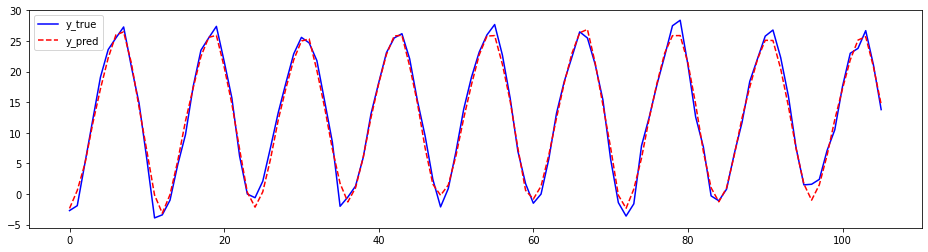

In [ ]:
plt.figure(figsize=(16, 4))
plt.plot(y_true, 'b-', label='y_true')
plt.plot(y_pred, 'r--', label='y_pred')
plt.legend()
plt.show()

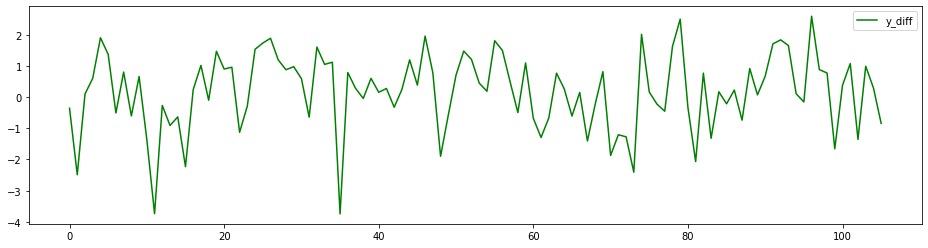

In [ ]:
plt.figure(figsize=(16, 4))
plt.plot(y_true - y_pred, 'g-', label='y_diff')
plt.legend()
plt.show()

In [ ]:
rmse = tf.sqrt(tf.keras.losses.MSE(y_true, y_pred))
mae = tf.keras.losses.MAE(y_true, y_pred)
mape = tf.keras.losses.MAPE(y_true, y_pred)
pd.DataFrame([rmse, mae, mape], index=['RMSE', 'MAE', 'MAPE'])

,0
RMSE,1.212165e+00
MAE,9.950343e-01
MAPE,1.457910e+07


# Preprocess

In [17]:
def read_dataframe(config, data_file):
    """
    데이터 조회
    :param config: config
    :param data_file: data file
    :return: 기간 내의 dataframe
    """
    # data frame 읽어오기
    df = pd.read_csv(data_file, encoding='CP949')
    # 일시를 날짜 형식으로 변경
    df['일시'] = pd.to_datetime(df['일시'], format='%Y-%m')
    # 월 정보 추가
    df['월'] = df["일시"].dt.month
    # 지점 필터
    if config['data']['x_locations']:
        df = df[df['지점'].isin(config['data']['x_locations'])]
    # 기간 필터
    start = pd.to_datetime(config['data']['train_start'])
    end = pd.to_datetime(config['data']['test_end'])
    df = df[(start <= df['일시']) & (df['일시'] <= end)]
    # 날짜 순으로 정렬
    df = df.sort_values('일시', ascending=True)
    return df

In [287]:
class MinMaxScaler():
    def __init__(self, min_val, max_val):
        assert (max_val > min_val)
        self.min_val = min_val
        self.max_val = max_val

    def scale_value(self, val):
        return (val - self.min_val) / (self.max_val - self.min_val)

    def inv_scale_value(self, scaled_val):
        return self.min_val + scaled_val * (self.max_val - self.min_val)

In [327]:
def _load_col_matrix(df, x_col):
    df_pivot = df.pivot_table(index=['지점'],
                              values=x_col,
                              columns=['일시'],
                              aggfunc='sum')
    for i in range(len(df_pivot)):
        mean = df_pivot.iloc[i].mean()
        df_pivot.iloc[i] =  df_pivot.iloc[i].fillna(mean)
    df_pivot = df_pivot.reset_index()

    df_matrix = df_pivot.drop(['지점'], axis=1).values
    scaler = MinMaxScaler(np.min(df_matrix), np.max(df_matrix))
    df_matrix = scaler.scale_value(df_matrix)
    df_matrix = np.expand_dims(df_matrix, axis=-1)
    return df_matrix, scaler

In [328]:
def _load_total_matrix(df, x_seq, x_cols):
    df_matrix_list, scaler_dic = [], {}
    for x_col in x_cols:
        df_tmp, scaler = _load_col_matrix(df, x_col)
        df_matrix_list.append(df_tmp)
        scaler_dic[x_col] = scaler
    if 1 < len(df_matrix_list):
        df_matrix = np.concatenate(df_matrix_list, axis=-1)
    else:
        df_matrix = df_matrix_list[0]

    bs, n_total, d_model = df_matrix.shape

    total_inputs, total_labels = [], []
    for i in range(n_total - x_seq):
        x = df_matrix[:, i:i + x_seq]
        y = df_matrix[:, i + 1:i + x_seq + 1, :1]
        total_inputs.append(x)
        total_labels.append(y)
    return total_inputs, total_labels, scaler_dic

In [329]:
def _load_col_item(df, x_item):
    if x_item == '지점':
        df = df.copy()
        df['지점2'] = df['지점']
        x_item = '지점2'
    df_pivot = df.pivot_table(index=['지점'],
                              values=x_item,
                              columns=['일시'],
                              aggfunc='sum')
    df_pivot = df_pivot.fillna(0)
    df_pivot = df_pivot.reset_index()

    df_matrix = df_pivot.drop(['지점'], axis=1).values
    df_matrix = np.expand_dims(df_matrix, axis=-1)
    return df_matrix

In [330]:
def _load_total_items(df, x_seq, x_items):
    df_matrix_list = []
    for x_item in x_items:
        df_tmp = _load_col_item(df, x_item)
        df_matrix_list.append(df_tmp)
    if 1 < len(df_matrix_list):
        df_matrix = np.concatenate(df_matrix_list, axis=-1)
    else:
        df_matrix = df_matrix_list[0]

    bs, n_total, d_model = df_matrix.shape

    total_items = []
    for i in range(n_total - x_seq):
        x = df_matrix[:, i:i + x_seq]
        total_items.append(x)
    return total_items

In [331]:
def _get_text_index(df, y_location):
    df_pivot = df.pivot_table(index=['지점'],
                              values='평균기온(°C)',
                              columns=['일시'],
                              aggfunc='sum')
    values = df_pivot.index.values
    for i, location in enumerate(values):
        if location == y_location:
            return i
    raise ValueError(f'y_location: {y_location}')

In [332]:
def load_data(df, config):
    x_seq = config['data']['x_seq']
    x_cols = config['data']['x_cols']
    x_items = config['data']['x_items'] if 'x_items' in config['data'] else []

    y_index = _get_text_index(df, config['data']['y_location'])

    test_start = pd.to_datetime(config['data']['test_start'])
    test_end = pd.to_datetime(config['data']['test_end'])
    df_test = df[(test_start <= df["일시"]) & (df["일시"] <= test_end)]
    test_len = len(df_test['일시'].unique())

    total_inputs, total_labels, scaler_dic = _load_total_matrix(df, x_seq, x_cols)

    train_inputs = total_inputs[:-test_len]
    train_inputs = np.concatenate(train_inputs, axis=0)
    train_labels = total_labels[:-test_len]
    train_labels = np.concatenate(train_labels, axis=0)

    test_inputs = total_inputs[-test_len:]
    test_inputs = [v[y_index:y_index+1] for v in test_inputs]
    test_inputs = np.concatenate(test_inputs, axis=0)
    test_labels = total_labels[-test_len:]
    test_labels = [v[y_index:y_index+1] for v in test_labels]
    test_labels = np.concatenate(test_labels, axis=0)

    if x_items:
        total_items = _load_total_items(df, x_seq, x_items)
        train_items = total_items[:-test_len]
        train_items = np.concatenate(train_items, axis=0)
        test_items = total_items[-test_len:]
        test_items = [v[y_index:y_index+1] for v in test_items]
        test_items = np.concatenate(test_items, axis=0)

        return ((train_inputs, train_items), train_labels), ((test_inputs, test_items), test_labels), scaler_dic
    else:
        return (train_inputs, train_labels), (test_inputs, test_labels), scaler_dic

In [333]:
with open(os.path.join(data_dir, 'config.yaml'), encoding='UTF-8') as f:
    config = yaml.load(f)
print(config)

{'data': {'data_file': 'OBS_ASOS_MNH_20201123233109.csv', 'train_start': '1904-04-01', 'train_end': '2009-12-31', 'test_start': '2010-01-01', 'test_end': '2020-10-31', 'x_locations': [], 'y_location': 119, 'x_cols': ['평균기온(°C)', '최고기온(°C)', '최저기온(°C)', '평균현지기압(hPa)', '평균해면기압(hPa)', '평균수증기압(hPa)', '평균이슬점온도(°C)', '평균상대습도(%)', '월합강수량(00~24h만)(mm)', '평균풍속(m/s)', '평균운량(1/10)', '일조율(%)'], 'y_col': '평균기온(°C)', 'x_items': ['지점', '월'], 'x_seq': 24, 'y_seq': 24}, 'model': {'name': 'base_lstm', 'lstm1_unit': 64, 'lstm2_unit': 64, 'lstm3_unit': 64, 'd_item': 4, 'dropout': 0.4}, 'optimizer': {'learning_rate': 0.0005}}


In [334]:
df = read_dataframe(config, os.path.join(data_dir, config['data']['data_file']))

In [335]:
train_data, test_data, scaler_dic = load_data(df, config)
if type(train_data[0]) == tuple:
    for data in train_data[0]:
        print('train inputs:', data.shape)
else:
    print('train inputs:', train_data[0].shape)
print('train labels:', train_data[1].shape)
if type(test_data[0]) == tuple:
    for data in test_data[0]:
        print('test inputs:', data.shape)
else:
    print('test inputs:', test_data[0].shape)
print('test labels:', test_data[1].shape)

train inputs: (128235, 24, 12)
train inputs: (128235, 24, 2)
train labels: (128235, 24, 1)
test inputs: (130, 24, 12)
test inputs: (130, 24, 2)
test labels: (130, 24, 1)


In [336]:
import tensorflow.keras.backend as K

In [337]:
def build_model_lstm_embed(config):
    x_seq = config['data']['x_seq']
    x_cols = config['data']['x_cols']
    x_items = config['data']['x_items']
    n_item = len(x_items)
    d_item = config['model']['d_item']

    inputs = tf.keras.layers.Input((x_seq, len(x_cols)))  # bs, x_seq, n_cols
    items = tf.keras.layers.Input((x_seq, n_item))  # bs, x_seq, n_items
    bs = tf.shape(items)[0]
    items_reshape = K.reshape(items, (bs, x_seq * n_item))  # bs, x_seq * n_item
    
    hidden_item = tf.keras.layers.Embedding(1000, d_item)(items_reshape)  # bs, x_seq * n_item, d_item
    hidden_item = K.reshape(hidden_item, (bs, x_seq, n_item * d_item))  # bs, x_seq, n_item * d_item
    hidden = tf.concat([inputs, hidden_item], axis=-1)  # bs, x_seq, n_col + n_items * d_item

    hidden = tf.keras.layers.LSTM(units=config['model']['lstm1_unit'], return_sequences=True)(hidden)  # (bs, x_seq, units)
    hidden = tf.keras.layers.LSTM(units=config['model']['lstm2_unit'], return_sequences=True)(hidden)  # (bs, x_seq, units)
    hidden = tf.keras.layers.LSTM(units=config['model']['lstm3_unit'], return_sequences=True)(hidden)  # (bs, x_seq, units)
    hidden = tf.keras.layers.Dropout(config['model']['dropout'])(hidden)

    output_dense = tf.keras.layers.Dense(1)
    outputs = output_dense(hidden)

    model = tf.keras.Model(inputs=(inputs, items), outputs=outputs)
    return model

In [359]:
model = build_model_lstm_embed(config)
model.summary()

Model: "functional_54"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_71 (InputLayer)           [(None, 24, 2)]      0                                            
__________________________________________________________________________________________________
tf_op_layer_Shape_32 (TensorFlo [(3,)]               0           input_71[0][0]                   
__________________________________________________________________________________________________
tf_op_layer_strided_slice_32 (T [()]                 0           tf_op_layer_Shape_32[0][0]       
__________________________________________________________________________________________________
tf_op_layer_Reshape_52/shape (T [(2,)]               0           tf_op_layer_strided_slice_32[0][0
______________________________________________________________________________________

In [360]:
model.compile(loss=tf.losses.MeanSquaredError(),
                  optimizer=tf.optimizers.Adam(learning_rate=config['optimizer']['learning_rate']))

In [361]:
# early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
# save weights
save_weights = tf.keras.callbacks.ModelCheckpoint('weights.hdf5',
                                                  monitor='val_loss',
                                                  verbose=1,
                                                  save_best_only=True,
                                                  mode='min',
                                                  save_freq='epoch',
                                                  save_weights_only=True)

In [362]:
history = model.fit(train_data[0], train_data[1], epochs=100, batch_size=4096,
                        validation_data=test_data,
                        callbacks=[early_stopping, save_weights])

Epoch 1/100
31/32 [============================>.] - ETA: 0s - loss: 0.1193
Epoch 00001: val_loss improved from inf to 0.10715, saving model to weights.hdf5
32/32 [==============================] - 4s 132ms/step - loss: 0.1188 - val_loss: 0.1072
Epoch 2/100
31/32 [============================>.] - ETA: 0s - loss: 0.0564
Epoch 00002: val_loss improved from 0.10715 to 0.08931, saving model to weights.hdf5
32/32 [==============================] - 3s 95ms/step - loss: 0.0563 - val_loss: 0.0893
Epoch 3/100
31/32 [============================>.] - ETA: 0s - loss: 0.0435
Epoch 00003: val_loss improved from 0.08931 to 0.07689, saving model to weights.hdf5
32/32 [==============================] - 3s 97ms/step - loss: 0.0434 - val_loss: 0.0769
Epoch 4/100
32/32 [==============================] - ETA: 0s - loss: 0.0348
Epoch 00004: val_loss improved from 0.07689 to 0.06268, saving model to weights.hdf5
32/32 [==============================] - 3s 95ms/step - loss: 0.0348 - val_loss: 0.0627
Epoch 5

In [363]:
model = build_model_lstm_embed(config)
model.load_weights('weights.hdf5')

In [364]:
y_true = test_data[1][:,-1, 0]
y_pred = model.predict(test_data[0])[:,-1, 0]

In [365]:
scaler = scaler_dic[config['data']['y_col']]
y_true = scaler.inv_scale_value(y_true)
y_pred = scaler.inv_scale_value(y_pred)

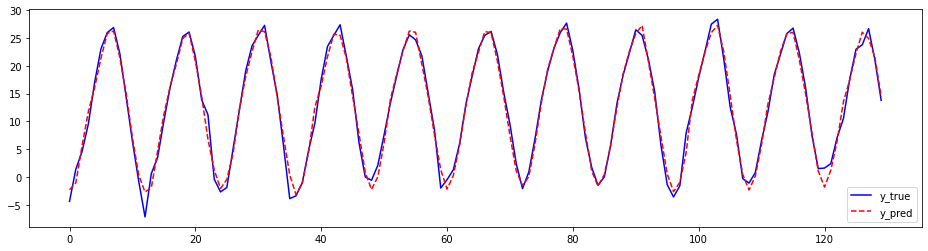

In [366]:
plt.figure(figsize=(16, 4))
plt.subplot(1, 1, 1)
plt.plot(y_true, 'b-', label='y_true')
plt.plot(y_pred, 'r--', label='y_pred')
plt.legend()
plt.show()

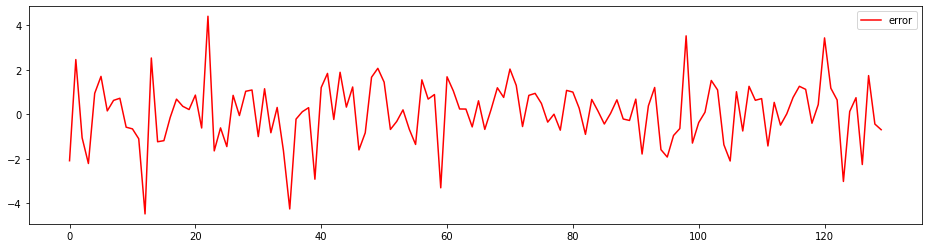

In [367]:
plt.figure(figsize=(16, 4))
plt.subplot(1, 1, 1)
plt.plot(y_true - y_pred, 'r-', label='error')
plt.legend()
plt.show()

In [368]:
tf.sqrt(tf.keras.losses.MSE(y_true, y_pred))

<tf.Tensor: shape=(), dtype=float32, numpy=1.3982822>